### The dataset is about Spotify 2019 Top 50 list and I'm trying to use visualizations to answer them

In [1]:
#Importing relevant libraries

import warnings
from warnings import filterwarnings

import numpy as np
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
#Loading and reading the dataset 
songs = pd.read_csv(r"C:\Users\hp\Desktop\kirtiwardhan\Datasets\top50.csv",encoding='latin-1')

In [3]:
#Viweing the top 5 observations with the function head()
songs.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [4]:
#With use of info() we can see the entire information of the dataset 
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
Unnamed: 0          50 non-null int64
Track.Name          50 non-null object
Artist.Name         50 non-null object
Genre               50 non-null object
Beats.Per.Minute    50 non-null int64
Energy              50 non-null int64
Danceability        50 non-null int64
Loudness..dB..      50 non-null int64
Liveness            50 non-null int64
Valence.            50 non-null int64
Length.             50 non-null int64
Acousticness..      50 non-null int64
Speechiness.        50 non-null int64
Popularity          50 non-null int64
dtypes: int64(11), object(3)
memory usage: 5.5+ KB


#### Pandas_Profiling is an awesome tool to autmate EDA

In [5]:
#Making a report of the dataset songs
report = pp.ProfileReport(songs)

In [6]:
#Saving the report in html format
report.to_file("songs.html")

In [7]:
#Droping the column as it serve no importance in analysis
songs.drop(columns=('Unnamed_0'),inplace=True)

In [8]:
#Groupby function helps in grouping the attributes and view the output by aggregating it with function
songs.groupby(['Track.Name','Artist.Name','Genre']).mean()

,,,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Track.Name,Artist.Name,Genre,,,,,,,,,,
0.958333333333333,Maluma,reggaeton,96,71,78,-5,9,68,176,22,28,89
7 rings,Ariana Grande,dance pop,140,32,78,-11,9,33,179,59,33,89
Antisocial (with Travis Scott),Ed Sheeran,pop,152,82,72,-5,36,91,162,13,5,87
Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
Call You Mine,The Chainsmokers,edm,104,70,59,-6,41,50,218,23,3,88
Callaita,Bad Bunny,reggaeton,176,62,61,-5,24,24,251,60,31,93
China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
Con Altura,ROSALÍA,r&b en espanol,98,69,88,-4,5,75,162,39,12,88
Con Calma,Daddy Yankee,latin,94,86,74,-3,6,66,193,11,6,91


In [10]:
artist_name = ('Ed Sheeran', 'Taylor Swift', 'Chris Brownh', 'Lizzo', 'Ali Gatie', 'Drake', 'Lil Tecca', 'Jhay Cortez', 
               'Maluma', 'Lauv', 'Lady Gaga', 'Lewis Capaldi','DJ Snake','Jonas Brothers','Nicky Jam','ROSALÍA',
              'Sam Smith','Lunay','Tones and I','Khalid','Martin Garrix','MEDUZA','Y2K','Bad Bunny','Daddy Yankee',
              'Young Thug','Katy Perry','Anuel AA','Kygo','Shawn Mendes','Lil Nas X','J Balvin','Ariana Grande',
              'Post Malone','The Chainsmokers','Billie Eilish','Marshmello','Sech')

<Figure size 1800x1440 with 0 Axes>

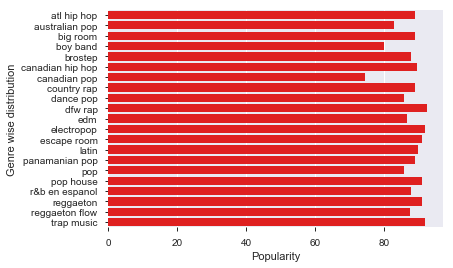

<Figure size 1800x1440 with 0 Axes>

In [11]:
data_group = songs.groupby(['Genre'])

genre = []
popularity = []


for name, group in data_group:
    genre.append(name)
    popularity.append(group['Popularity'].mean())

sns.barplot(y=genre,x=popularity,orient='h',color='r')
plt.xlabel('Popularity')
plt.ylabel('Genre wise distribution')
plt.yticks(range(len(genre)), genre)
plt.figure(figsize=(25,20))

<Figure size 1800x1440 with 0 Axes>

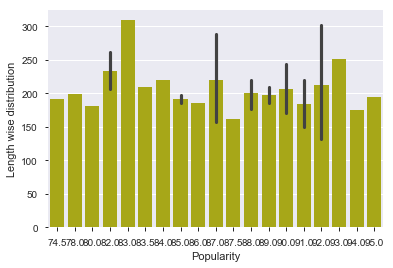

<Figure size 1800x1440 with 0 Axes>

In [15]:
data_group = songs.groupby(['Length.'])

Length = []
popularity = []


for name, group in data_group:
    Length.append(name)
    popularity.append(group['Popularity'].mean())

sns.barplot(y=Length,x=popularity,orient='v',color='y')
plt.xlabel('Popularity')
plt.ylabel('Length wise distribution')
plt.figure(figsize=(25,20))

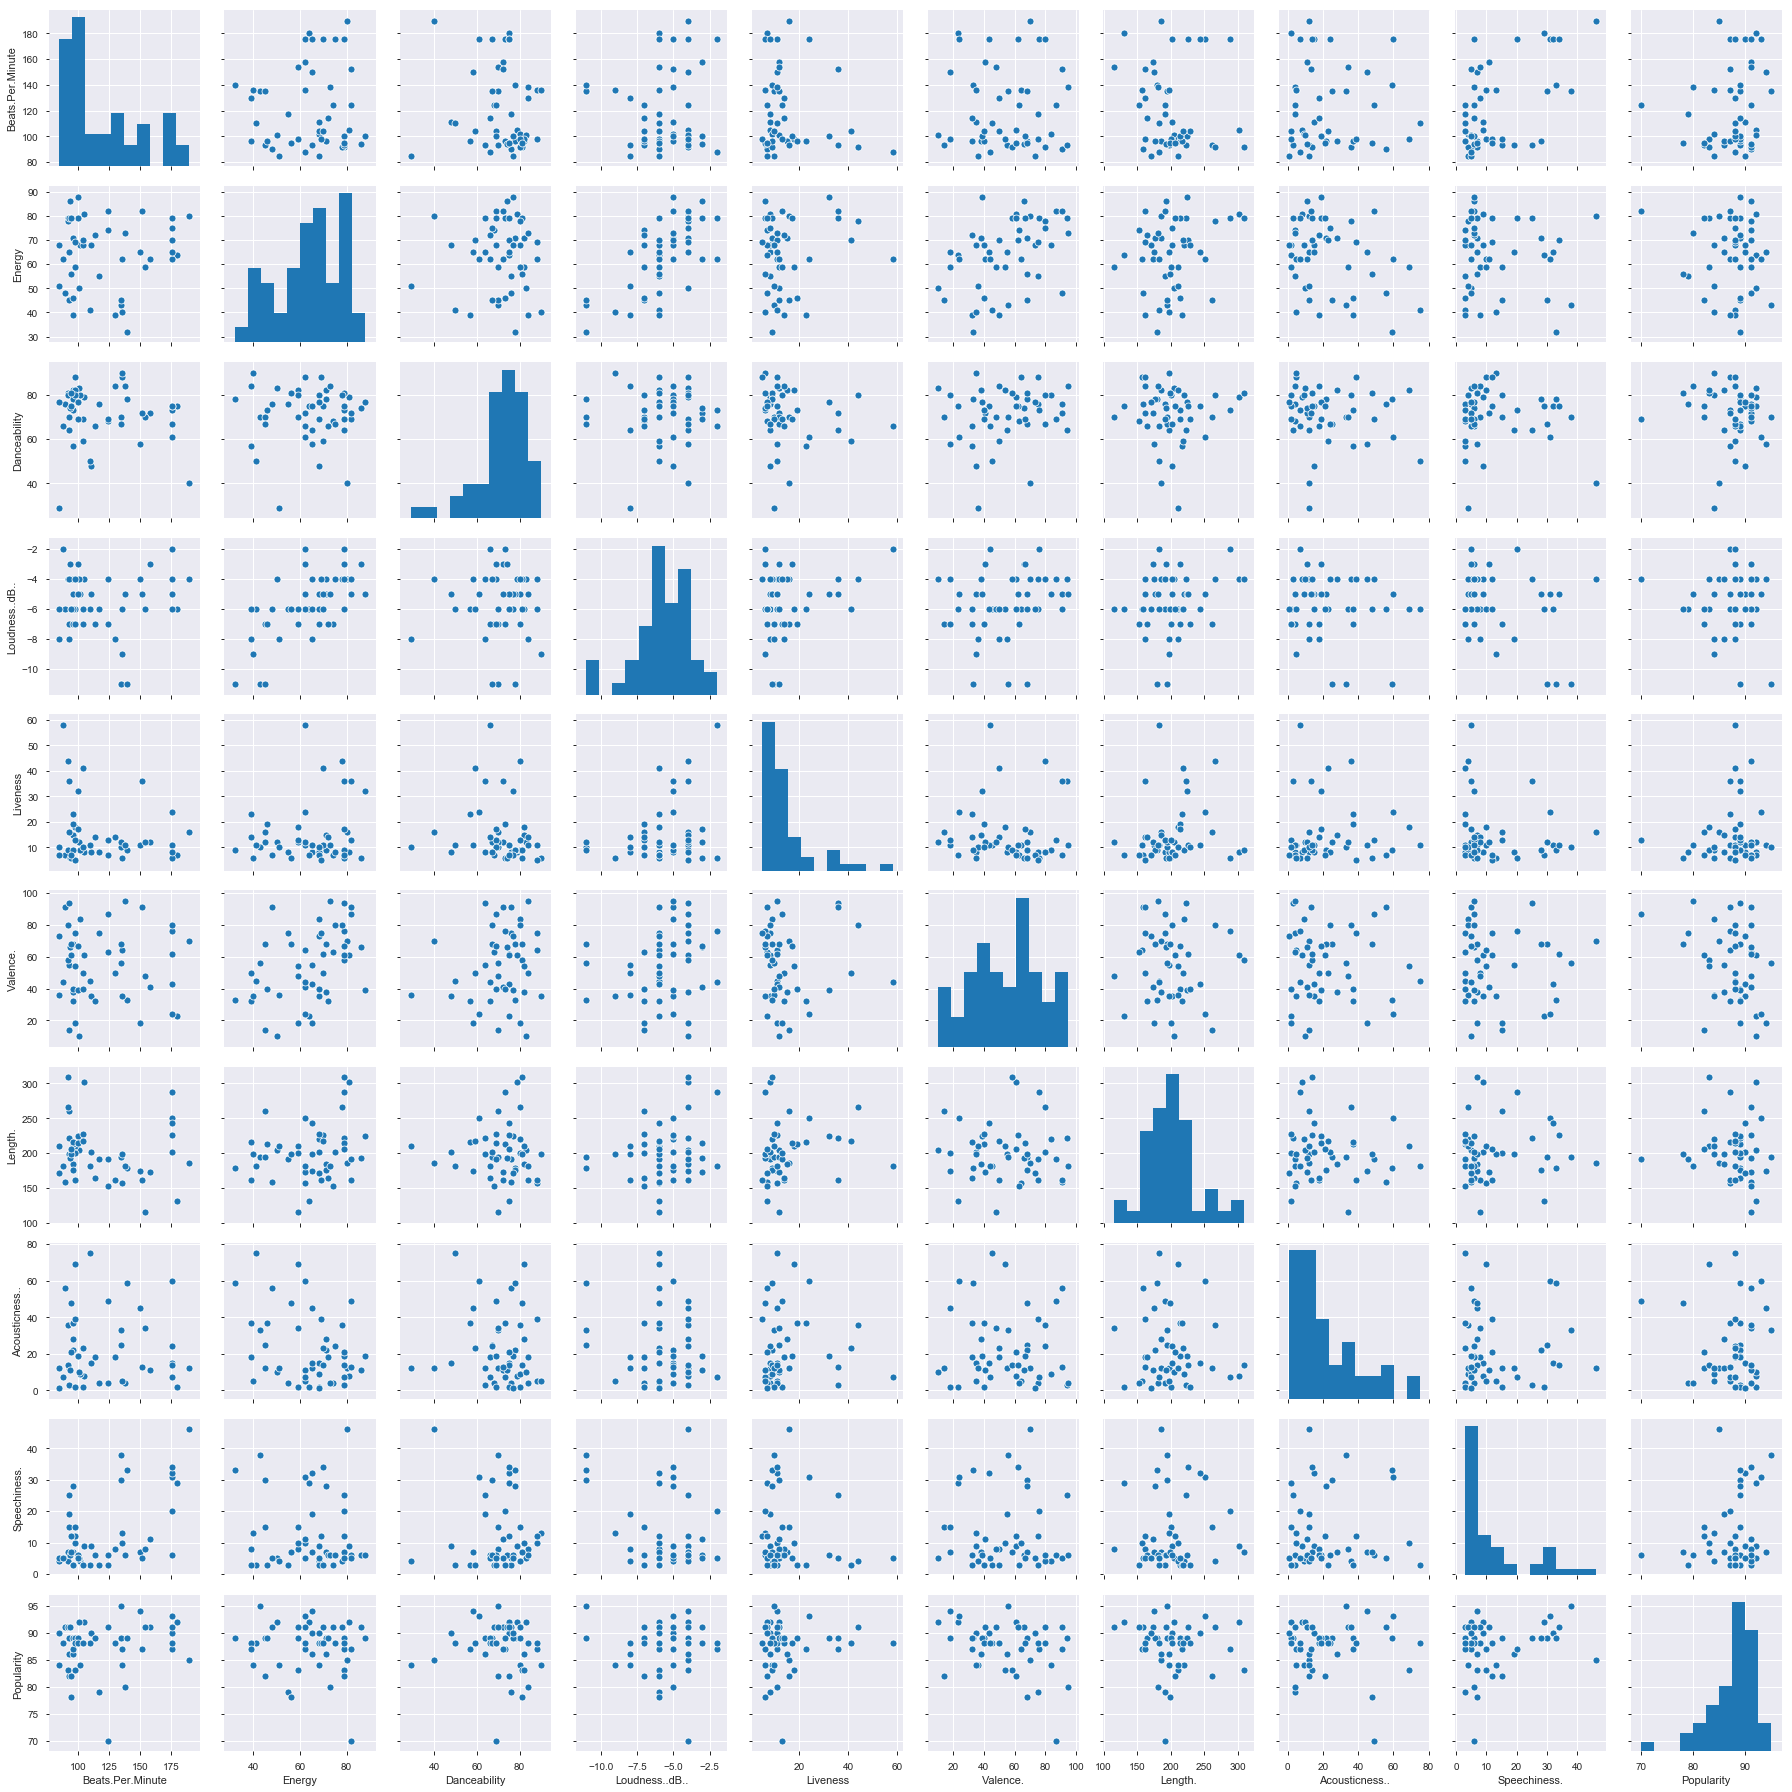

In [16]:
#Using pairplot for bivariate analysis
sns.pairplot(songs)

<Figure size 3600x2880 with 0 Axes>

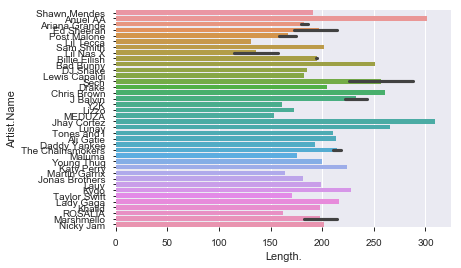

<Figure size 3600x2880 with 0 Axes>

In [34]:
#Using barplot for drawing info regarding the length of the songs wrt Artists' name
sns.barplot(x='Length.',y='Artist.Name',data = songs)
plt.figure(figsize=(50,40))

In [35]:
#Checking the correlation amongst the variables 
songs.corr()

,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
Beats.Per.Minute,1.000000,0.043756,-0.094183,0.017016,-0.167286,-0.011586,-0.139288,-0.031450,0.557052,0.196097
Energy,0.043756,1.000000,0.018254,0.670794,0.162768,0.438820,0.224677,-0.339892,-0.089860,-0.080295
Danceability,-0.094183,0.018254,1.000000,0.016255,-0.149636,0.172829,-0.000185,-0.098165,-0.103472,-0.071413
Loudness..dB..,0.017016,0.670794,0.016255,1.000000,0.258652,0.237614,0.219219,-0.138300,-0.272213,-0.043085
Liveness,-0.167286,0.162768,-0.149636,0.258652,1.000000,0.016123,0.131782,0.021328,-0.125286,0.092564
Valence.,-0.011586,0.438820,0.172829,0.237614,0.016123,1.000000,-0.017782,-0.052323,-0.053242,-0.317752
Length.,-0.139288,0.224677,-0.000185,0.219219,0.131782,-0.017782,1.000000,-0.076293,0.046755,-0.087639
Acousticness..,-0.031450,-0.339892,-0.098165,-0.138300,0.021328,-0.052323,-0.076293,1.000000,0.008293,-0.034684
Speechiness.,0.557052,-0.089860,-0.103472,-0.272213,-0.125286,-0.053242,0.046755,0.008293,1.000000,0.238553
Popularity,0.196097,-0.080295,-0.071413,-0.043085,0.092564,-0.317752,-0.087639,-0.034684,0.238553,1.000000


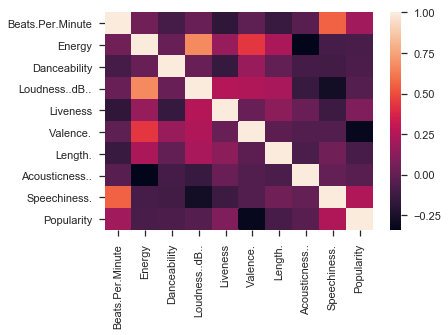

In [38]:
#Let's plot heatmap to vizualise thr correlation 
sns.heatmap(songs.corr())
sns.set(style='whitegrid')

<Figure size 2160x2160 with 0 Axes>

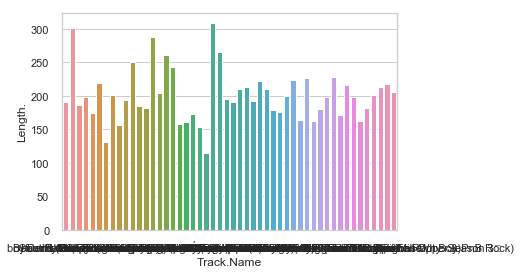

<Figure size 2160x2160 with 0 Axes>

In [44]:
sns.barplot(x='Track.Name',y='Length.',data=songs)
plt.figure(figsize=(30,30))

In [48]:
df1 = songs.groupby(['Track.Name','Length.','Genre','Artist.Name'])['Popularity'].apply(lambda x:x.min()).to_frame()

df1.sort_values('Popularity',ascending = False).groupby(level = 0).head()

,,,,Popularity
Track.Name,Length.,Genre,Artist.Name,
bad guy,194,electropop,Billie Eilish,95
Goodbyes (Feat. Young Thug),175,dfw rap,Post Malone,94
Callaita,251,reggaeton,Bad Bunny,93
Ransom,131,trap music,Lil Tecca,92
China,302,reggaeton flow,Anuel AA,92
Money In The Grave (Drake ft. Rick Ross),205,canadian hip hop,Drake,92
Piece Of Your Heart,153,pop house,MEDUZA,91
Panini,115,country rap,Lil Nas X,91
Con Calma,193,latin,Daddy Yankee,91


In [53]:
#Plotly library is another EDA tool useful to vizualise the data in the form of plots
import plotly.express as px

fig = px.box(songs,x='Artist.Name',y='Popularity')
fig.update_layout(title_text='Top 50 Songs of artists by their popularity',xaxis=dict(tickangle=45))
fig.show()

### The Notebook is WIP and will keep on working further